### Computational Physics  
##### midtern exam 2024

**Question : Please analyze the full motion of a pendulum for the zero-G experience**  

a) The metal pendulum is initially at rest.  
b) You apply periodic external force to move the
pendulum (by magnet, for example)  
c) The mass of the pendulum reaches 60 degree
relative to its equilibrium position.  
d) Then, you remove magnet and the airplane lifts
off.  
e) Refer the previous page to see the motions of
the airplane.  
f) Eventually, the pendulum stops due to the air
drag and frictions  

A box with a pendulum in it is hung to the ceiling of the airplane room.  
The pivot adjusts the orientation of the box relative to the airplane
direction so that the angular momentum of the box-plane system is
conserved.  
Air can get in the box through the holes.  
Now, a pendulum is placed such that one end is fixed and the other
end has a ball of mass M with massless rigid rod.  
The airplane can change its maneuver to create different values of
gravity, for example, near zero-G.  
Please imagine you are inside the box and describe the motion of the
pendulum when the airplane travels in the sky for 2 minutes.  

**Model the motion of the pendulum as close as the reality for about 2.0 minutes.  
**Apply reasonable assumptions when modeling, especially for the frictions and air drag.  
Of course, assume the mass and length of the pendulum as well reasonably.  
** Model properly for the variable gravity using the previous graphs.  
1. your equation of the motion.  
2. plots of an angle, an angular velocity, an external driving force, and a gravity distribution as functions of time.  
3. python code and movie of the full motion of the pendulum.  
4. Please specify your assumptions and explain your solution  
5. What would happen if the pendulum goes near the Neutron Star where the gravity reaches to 10^12 m/s^2 ?  

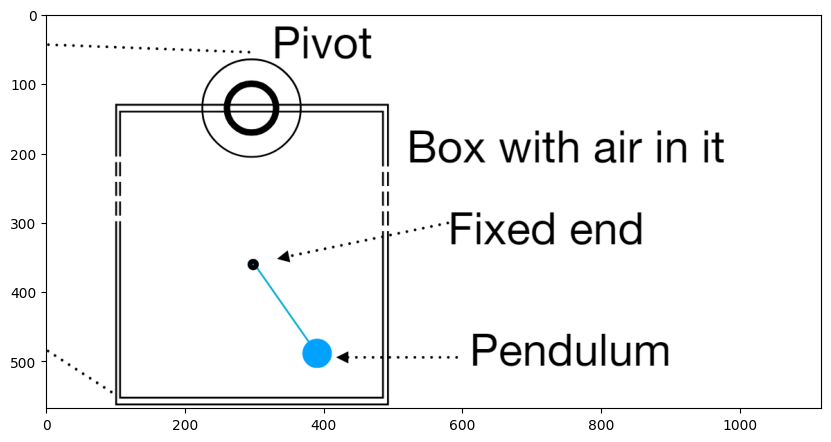

In [19]:
#figire.1

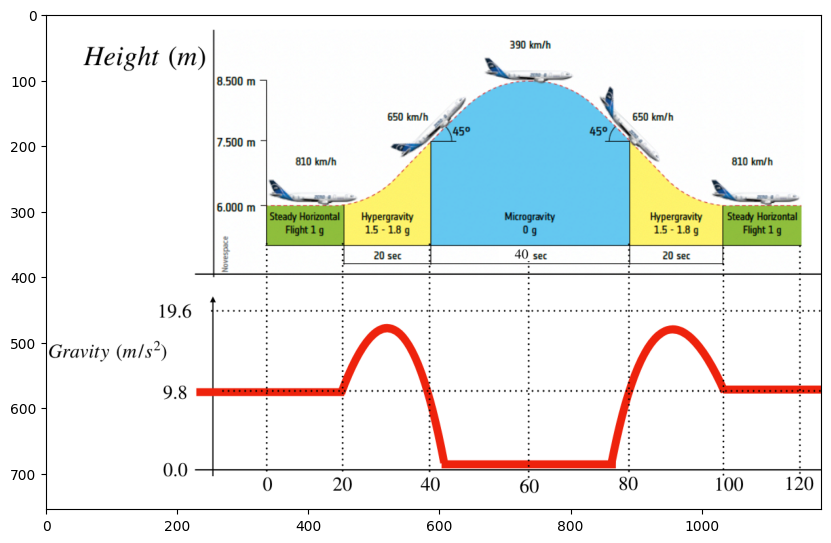

In [18]:
#figire.2

### main code

In [65]:
#mina function
import pygame
import sys 

from math import *
import numpy as np
from numpy.linalg import inv

############################################################
#pygame setting 

white = pygame.Color('white')
black = pygame.Color('black')
width, height = 1000, 800
screen = pygame.display.set_mode((width,height))
screen.fill(black)

pygame.display.update()
clock = pygame.time.Clock()

#global parameter
count = 0.0
a = 0.0
x_center, y_center = 0.5*width, 0.2*height
t,delta_t = 0.0, 0.01
#physics parameter
g = 9.8
gamma_p, gamma_b = 0.12, 0.1 #진자, 상자 공기저항 

m1, m2 = 9999.0, 1.0   
l1, l2 = 4.0, 1.0

y = np.array([0.0,0.0,0.0,np.pi/3])    
L = np.array([[l1,0.0],[0.0,1.0]])
F = np.array([0.0,0.0,0.0,0.0])

inv_L = inv(L)
############################################################
#Slope(G) function

#gravity of time function
def cal_hypergravity(time, g):
    val = -0.008 * time**2 + 0.48 * time - 5.4
    return g * val 

def airplane_gravity(time, g):
    if time < 20:
        return g
    elif 20 <= time < 45:
        return cal_hypergravity(time, g)
    elif 45 <= time < 75:
        return 0 
    elif 75 <= time < 100:
        return cal_hypergravity(time-60, g)
    elif 100 <= time <= 120:
        return g

def G(t, y):
    gravity_acceleration = airplane_gravity(t, g)
    F[0] = -m2 * l2/4 * y[1]**2 * sin(y[2] - y[3]) - (m1 + m2) * gravity_acceleration * sin(y[2]) 
    F[1] = l1 * y[0]**2 * sin(y[2] - y[3]) - gravity_acceleration* sin(y[3]) 
    F[2] = y[0]
    F[3] = y[1]

    F_p=-gamma_p**l2*y[1]
    F_b=-gamma_b*l1* y[0]

    F[1]+=F_p    
    F[0]+=F_b    
  
    L = np.array([
        [(m1+m2)*l1         ,m2*l2*cos(y[2]-y[3])   ,0.0,0.0],
        [l1*cos(y[2]-y[3])  ,l2                     ,0.0,0.0],
        [0.0                ,0.0                    ,1.0,0.0],
        [0.0                ,0.0                    ,0.0,1.0],
    ])

    return inv(L).dot(F)

#Runge-Kutta 4th function
def RK4(t, y, delta_t):
    k1 = G(t, y)
    k2 = G(t + 0.5*delta_t, y + 0.5*delta_t * k1)
    k3 = G(t + 0.5*delta_t, y + 0.5*delta_t * k2)
    k4 = G(t + 1.0*delta_t, y + 1.0*delta_t * k3)

    return (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
############################################################

#calcurate position 
def position(angle1, angle2,angle_up, angle_up2):
    x1 = 100*l1 * sin(angle1) + x_center
    y1 = 100*l1 * cos(angle1) + y_center
    x2 = 100*l2 * sin(angle2) + x1
    y2 = 100*l2 * cos(angle2) + y1
    # #왼쪽 윗변의 위치 
    l1_up=1.5
    
    x_up1= 100*l1_up * sin(angle_up-np.pi/2) + x_center
    y_up1= 100*l1_up * cos(angle_up-np.pi/2) + y_center
    #오른쪽 윗변의 위치
    x_up2= 100 *l1_up* sin(angle_up2+np.pi/2) + x_center
    y_up2= 100 *l1_up* cos(angle_up2+np.pi/2) + y_center

    return (x1, y1), (x2, y2) ,(x_up1, y_up1), (x_up2,y_up2) 

def square(x0,y0,x1,y1,length):
    if x1 == x0:  # Handle the case where the line is vertical
        line_angle = -np.pi / 2  # 90 degrees downward
    else:
        m = (y1 - y0) / (x1 - x0)
        line_angle = np.arctan(m) - np.pi / 2  # 90 degrees downward

    # Calculate positions of the square vertices based on the central line
    s1 = (x0 - length / 2 * cos(line_angle), y0 - length / 2 * sin(line_angle))
    s2 = (x0 + length / 2 * cos(line_angle), y0 + length / 2 * sin(line_angle))
    s3 = (x1 + length / 2 * cos(line_angle), y1 + length / 2 * sin(line_angle))
    s4 = (x1 - length / 2 * cos(line_angle), y1 - length / 2 * sin(line_angle))

    return [s1,s2,s3,s4]

def render_square(position1_xy, position2_xy):
    square_pos = square(x_center, y_center, position1_xy[0], position1_xy[1], 400)

    pygame.draw.line(screen,white,(square_pos[0]),(square_pos[1]),3)
    pygame.draw.line(screen,white,(square_pos[1]),(square_pos[2]),3)
    pygame.draw.line(screen,white,(square_pos[0]),(square_pos[3]),3)
    pygame.draw.line(screen,white,(square_pos[2]),(square_pos[3]),3)
#############################################################
#render 
def render(position1_xy, position2_xy):
        screen.fill(black)
        pygame.draw.circle(screen, white, (x_center, y_center) , 20)
        pygame.draw.circle(screen, black, (x_center, y_center) , 10)

        pygame.draw.line(screen, white,(position1_xy[0], position1_xy[1]-200), (position2_xy[0],position2_xy[1]-200), 3)
        pygame.draw.circle(screen, white, (position2_xy[0],position2_xy[1]-200) , 10)

#############################################################
#main loop 
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
    count +- 1 

    position1_xy, position2_xy, position1,position2= position(y[2],y[3],y[2],y[2])
    render(position1_xy, position2_xy)
    render_square(position1_xy, position2_xy)
    
    t += delta_t
    y = y + delta_t * RK4(t, y, delta_t)

    clock.tick(60)
    pygame.display.update() 

SystemExit: 

### Ploting parameter

##### Gravity Distribution

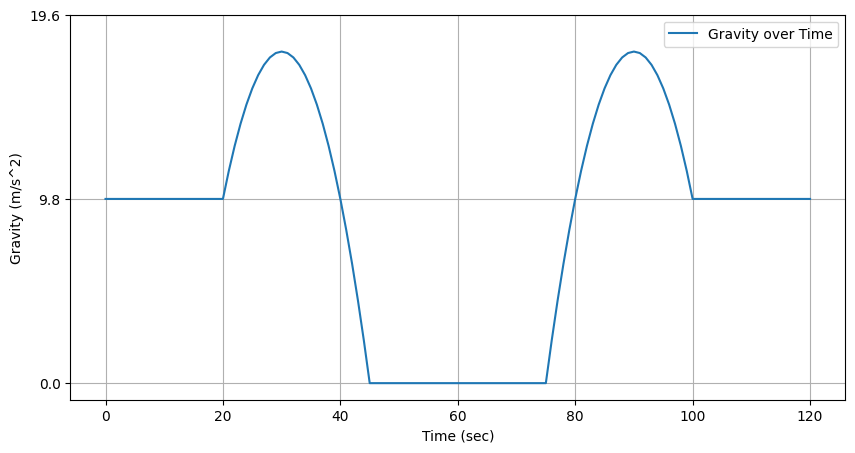

##### Angle

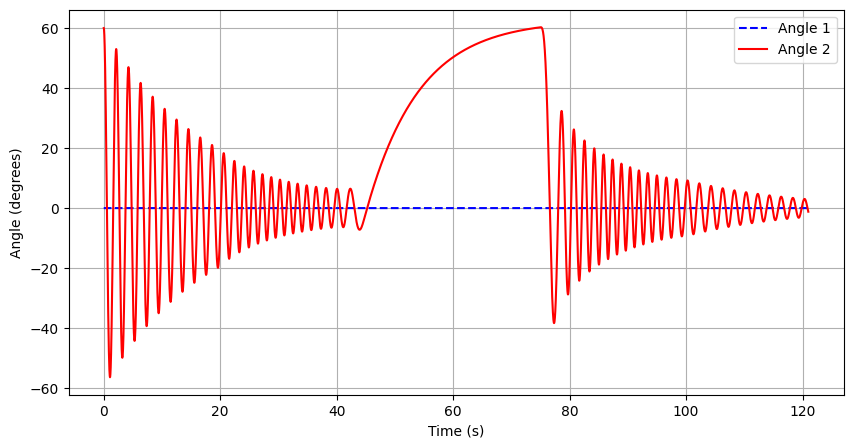

##### Angle Velocity

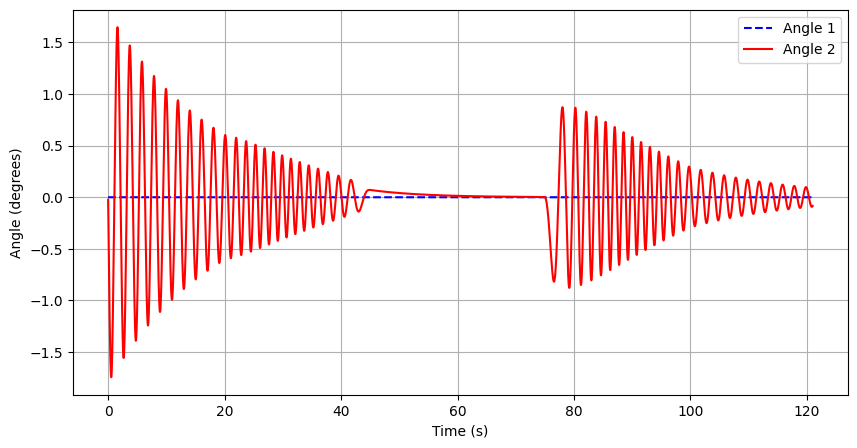